### import libraries

In [60]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:

# lod the dataset
data = pd.read_csv('../data/raw/diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# mini eda

| **Column Name**              | **Meaning / Description**                                                  |
| ---------------------------- | -------------------------------------------------------------------------- |
| **encounter_id**             | Unique ID for each hospital visit.                                         |
| **patient_nbr**              | Unique patient identifier (one patient can have multiple encounters).      |
| **race**                     | Patient’s race (e.g., Caucasian, AfricanAmerican, Hispanic, Asian, Other). |
| **gender**                   | Patient’s gender (Male, Female, Unknown).                                  |
| **age**                      | Age group in 10-year intervals (e.g., `[70-80)`).                          |
| **admission_type_id**        | Type of hospital admission (emergency, urgent, elective, etc.).            |
| **discharge_disposition_id** | How the patient left the hospital (e.g., home, transferred, expired).      |
| **admission_source_id**      | Source of admission (e.g., referral, ER).                                  |
| **time_in_hospital**         | Number of days patient stayed in the hospital.                             |
| **num_lab_procedures**       | Number of lab tests performed.                                             |
| **num_procedures**           | Number of non-lab procedures performed.                                    |
| **num_medications**          | Number of medications the patient received.                                |
| **number_outpatient**        | Number of outpatient visits in the past year.                              |
| **number_emergency**         | Number of emergency visits in the past year.                               |
| **number_inpatient**         | Number of inpatient visits in the past year.                               |
| **diag_1**                   | Primary diagnosis (ICD-9 code).                                            |
| **diag_2**                   | Secondary diagnosis (ICD-9 code).                                          |
| **diag_3**                   | Third diagnosis (ICD-9 code).                                              |
| **number_diagnoses**         | Count of distinct diagnoses recorded for the encounter.                    |
| **max_glu_serum**            | Glucose test result (`None`, `>200`, `>300`, `Norm`).                      |
| **A1Cresult**                | A1C test result (`None`, `>7`, `>8`, `Norm`).                              |
| **metformin**                | Status of metformin medication (`No`, `Steady`, `Up`, `Down`).             |
| **repaglinide**              | Status of repaglinide medication.                                          |
| **nateglinide**              | Status of nateglinide medication.                                          |
| **chlorpropamide**           | Status of chlorpropamide medication.                                       |
| **glimepiride**              | Status of glimepiride medication.                                          |
| **acetohexamide**            | Status of acetohexamide medication.                                        |
| **glipizide**                | Status of glipizide medication.                                            |
| **glyburide**                | Status of glyburide medication.                                            |
| **tolbutamide**              | Status of tolbutamide medication.                                          |
| **pioglitazone**             | Status of pioglitazone medication.                                         |
| **rosiglitazone**            | Status of rosiglitazone medication.                                        |
| **acarbose**                 | Status of acarbose medication.                                             |
| **miglitol**                 | Status of miglitol medication.                                             |
| **troglitazone**             | Status of troglitazone medication.                                         |
| **tolazamide**               | Status of tolazamide medication.                                           |
| **examide**                  | Status of examide medication.                                              |
| **citoglipton**              | Status of citoglipton medication.                                          |
| **insulin**                  | Status of insulin medication (`No`, `Steady`, `Up`, `Down`).               |
| **change**                   | Whether medications were changed (`Ch`, `No`).                             |
| **diabetesMed**              | Whether the patient was on diabetes medication (`Yes`, `No`).              |
| **readmitted**               | Target variable: `<30` (positive class), `>30`, `NO`.                      |


In [62]:
# mini eda
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [63]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [64]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [65]:
data.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [66]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [67]:
data['readmitted'].value_counts()
data['readmitted'].value_counts(normalize=True)

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64

In [68]:
# categorical values overview
cat_cols = data.select_dtypes(include=object).columns

for col in cat_cols:
    print(col, data[col].unique()[:10])


race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM']
medical_specialty ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology']
diag_1 ['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7']
diag_2 ['?' '250.01' '250' '250.43' '157' '411' '492' '427' '198' '403']
diag_3 ['?' '255' 'V27' '403' '250' 'V45' '38' '486' '996' '197']
max_glu_serum [nan '>300' 'Norm' '>200']
A1Cresult [nan '>7' '>8' 'Norm']
metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']


In [69]:
# missing values summary
missing = data.isnull().mean().sort_values(ascending=False)
missing.head(20)


max_glu_serum               0.947468
A1Cresult                   0.832773
race                        0.000000
gender                      0.000000
age                         0.000000
weight                      0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
payer_code                  0.000000
medical_specialty           0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
encounter_id                0.000000
patient_nbr                 0.000000
number_inpatient            0.000000
number_emergency            0.000000
dtype: float64

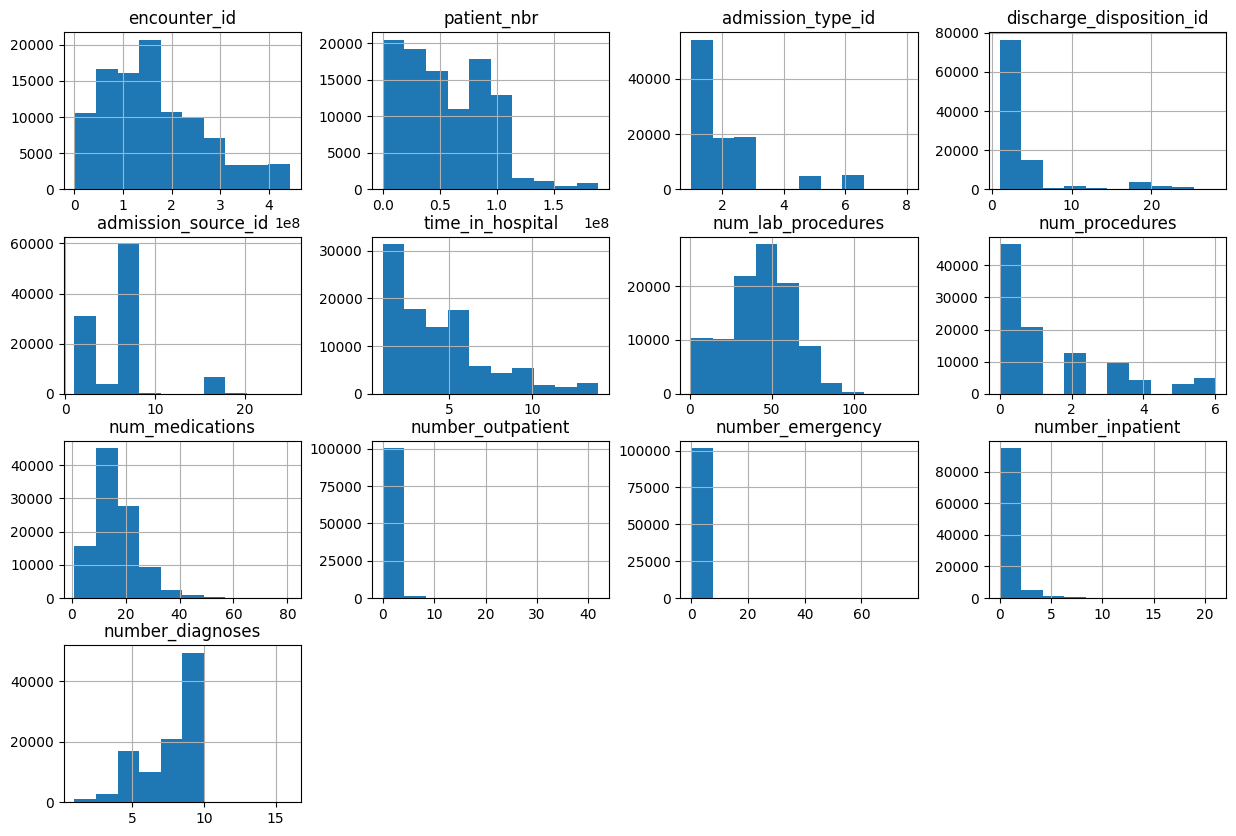

In [70]:
# outlier5s visualisation
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

data[num_cols].hist(figsize=(15,10))
plt.show()


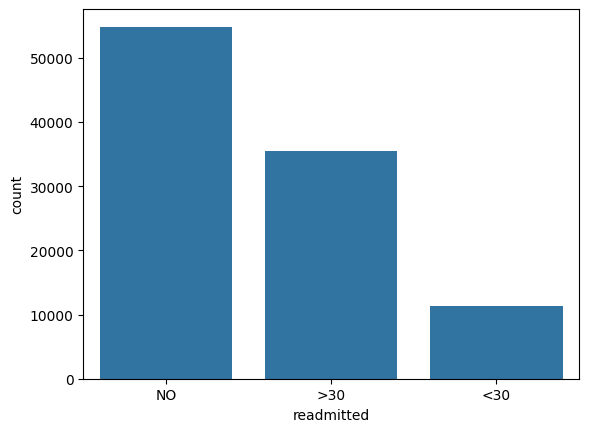

In [71]:
sns.countplot(x=data['readmitted'])
plt.show()


# data cleaning

In [72]:
# handle ? values
data = data.replace("?", np.nan)
data.isnull().sum().sort_values(ascending=False)


weight                      98569
max_glu_serum               96420
A1Cresult                   84748
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
patient_nbr                     0
time_in_hospital                0
admission_source_id             0
num_lab_procedures              0
encounter_id                    0
admission_type_id               0
discharge_disposition_id        0
gender                          0
age                             0
number_inpatient                0
number_emergency                0
number_outpatient               0
num_medications                 0
num_procedures                  0
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [73]:
# dropping columns with high missing values
data = data.drop(columns=['weight', 'payer_code', 'medical_specialty'])
# drop irrelevant columns
data = data.drop(columns=['encounter_id', 'patient_nbr'])

In [74]:
# convert target variable to binary
data['readmitted'] = data['readmitted'].map({
    '<30': 1,
    'NO': 0,
    '>30': 0
})


In [75]:
#use unknown for missing race values 
data['race'] = data['race'].fillna('Unknown')
# print data sample
data.sample(10) 

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
77208,Caucasian,Male,[50-60),1,1,7,4,34,0,21,...,No,Up,No,No,No,No,No,Ch,Yes,0
50998,Caucasian,Female,[50-60),1,1,7,7,74,0,12,...,No,No,No,No,No,No,No,No,Yes,0
63159,Caucasian,Female,[60-70),2,6,7,7,81,1,25,...,No,Up,No,No,No,No,No,Ch,Yes,0
41504,Caucasian,Male,[80-90),2,1,7,5,46,0,8,...,No,No,No,No,No,No,No,No,Yes,1
100179,Caucasian,Male,[80-90),1,6,7,3,75,3,22,...,No,Down,No,No,No,No,No,Ch,Yes,0
61756,Caucasian,Female,[50-60),5,3,1,14,55,0,13,...,No,Down,No,No,No,No,No,Ch,Yes,0
83539,Asian,Female,[70-80),2,3,7,5,66,0,16,...,No,Up,No,No,No,No,No,Ch,Yes,0
97028,Other,Female,[70-80),1,1,7,4,9,1,9,...,No,No,No,No,No,No,No,No,Yes,0
88749,Caucasian,Female,[60-70),2,6,7,2,40,0,10,...,No,No,No,No,No,No,No,Ch,Yes,0
34139,Unknown,Female,[70-80),2,1,1,1,31,5,11,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [76]:
# clean gender
data = data[data['gender'].isin(['Male', 'Female'])]



In [78]:
# Check unique age values to understand the format
print(data['age'].unique())
print(data['age'].value_counts())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


In [79]:
def convert_age(age):
    if pd.isna(age):
        return np.nan
    
    # Remove [, ], (, )
    age = age.replace("[", "").replace(")", "").replace("]", "")
    
    low, high = age.split("-")
    return (int(low) + int(high)) // 2

data['age'] = data['age'].apply(convert_age)
data.sample(10)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
77775,Unknown,Female,85,1,3,7,6,73,0,17,...,No,Up,No,No,No,No,No,Ch,Yes,0
23768,Caucasian,Male,75,1,1,7,5,47,5,19,...,No,Steady,No,No,No,No,No,Ch,Yes,0
49045,Caucasian,Female,55,6,6,17,7,44,0,22,...,No,Up,No,No,No,No,No,Ch,Yes,0
67052,Caucasian,Male,75,2,3,1,9,83,5,26,...,No,Steady,No,No,No,No,No,No,Yes,0
92337,Caucasian,Male,65,1,1,7,5,75,1,20,...,No,Steady,No,No,No,No,No,Ch,Yes,0
34975,Caucasian,Female,75,1,1,7,4,46,2,19,...,No,Steady,No,No,No,No,No,No,Yes,0
73241,AfricanAmerican,Male,45,1,1,7,3,71,0,20,...,No,Steady,No,No,No,No,No,Ch,Yes,0
11044,AfricanAmerican,Male,65,1,18,7,6,62,6,17,...,No,No,No,No,No,No,No,No,Yes,0
97645,Caucasian,Female,75,3,1,1,2,44,6,16,...,No,Down,No,No,No,No,No,Ch,Yes,1
1157,AfricanAmerican,Female,75,2,1,1,5,45,0,10,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [ ]:
data['age'].nunique()

10